Functions

@Authors: Sridhar Nerur, Samuel Jayarajan, and Mahyar Vaghefi

A function in Python and other languages is often written to accomplish a specific task. There are many built-in functions in Python as well as functions available in libraries/packages (e.g., math) that simplify programming. Given below are some examples of functions.

len([1, 2, 3]) --> 3
len function gives the length of the argument - a list in this case

len("hello") --> 5 (argument is a string in this example)

sum([1, 2, 3, 4]) --> 10 (argument is a list)

min(8, 3) --> 3. (min returns minimum of two numbers)

math.sqrt(5) --> 2.23606797749979 (5 is the argument)
math.pow(2, 3) --> 8.0 (2 and 3 are arguments)

print("Hello World!") --> Hello World!

print() --> displays a blank line (Note that this time there is no argument)

What can we infer from these examples?
1. Functions perform specific tasks - finding minimum/maximum, summing, printing, finding length, and so forth.
2. Functions are cohesive - they are very focused; it is never a good idea to have functions that do multiple things. For example, in a banking application, you should have separate functions for withdrawal and deposits.
3. Functions take zero or more arguments.
4. Functions may or may not return values. For example, the math.sqrt function returns a value, but you could have functions that perform a task without returning anything (we will see examples of these later).

Why use functions?
1. Functions can be used to organize your programs. When written well, they make your programs easier to read and maintain.
2. They can be built and tested independently (and, therefore, in parallel).
3. Functions can be reused. Indeed, it is a good idea to build a library of functions that you use over and over again. They can be used to accelerate development.
4. Functions can be used by others without knowing how exactly they were written.

The anotamy of a function is:

def function_name([parameters]):
    Body of function
    
Note that some functions return values while others don't.

Time to code......

In [7]:
def sum(a, b): #a and b are called parameters; sum is the name of the function
    """Adds two numbers and returns sum"""
    return a + b #return explicitly returns a value - (a + b) in this case


In [8]:
#The function sum has two parameters, namely, a and b...let us try it
sum(15, 23)

38

In [11]:
#What if we passed strings or lists, or anything that uses the "+" operator
print(sum("Good","Bye")) #should concatenate "Good" and "Bye"
print(sum([1,2,3],[4,5,6])) #should create a single list with all elements

GoodBye
[1, 2, 3, 4, 5, 6]


In [13]:
#Slightly more complex function
def ask_yes_no(question):
    """Ask a yes or no question"""
    response = None
    while response not in ("y", "n"):
        response = input(question).lower()
    return response 


In [14]:
ask_yes_no("Do you wish to continue? [y or n]: ")

Do you wish to continue? [y or n]: x
Do you wish to continue? [y or n]: n


'n'

Note that functions such as ask_yes_no() can be reused in a variety of situations that require the user to provide a yes or no answer.

In [22]:
#Let us look at a slightly more complex function for cleaning up 
import string #for getting punctuation and digits
def preprocess_text(aString, punctuation = True, digits = False, stopwords = None):
    cleaned_text = aString.lower() #good to normalize text
    if punctuation: #do this if punctuation has to be removed
        p = string.punctuation
        table = str.maketrans(p, len(p) * " ")
        cleaned_text = cleaned_text.translate(table)
    
    if digits: #do this to remove digits
        d = string.digits
        table = str.maketrans(d, len(d) * " ")
        cleaned_text = cleaned_text.translate(table)
    
    if stopwords: #if this is not None
        clean_words = [word for word in cleaned_text.split() if word not in stopwords]
        cleaned_text = " ".join(clean_words)
    
    return cleaned_text
    

In [23]:
s = "2020 has been a terrible year. What a tragedy! So many lives lost. Why did this happen?"
preprocess_text(s) #I am using default settings

'2020 has been a terrible year  what a tragedy  so many lives lost  why did this happen '

Let us try to understand the function to preprocess text. The function takes four parameters, of which the last 3 have default values. When the string/text is sent as an argument to this function without other parameters, it is stripped of punctuation (because punctuation = True), but digits are ignored (because digits = False), and there are no stopwords to be removed (because stopwords = None). By the way, stopwords are words such as "is", "of", "the", and "an" that are generally not very useful in many text analytics applications.
The default settings give us a lot of flexibility. Let us see a few different calls to the function.

In [24]:
preprocess_text(s, punctuation = False, digits = True) #No punctuation and stopwords

'     has been a terrible year. what a tragedy! so many lives lost. why did this happen?'

In [25]:
stopwords = ['has','been','a','so','the','this'] #words to remove
preprocess_text(s, stopwords = stopwords)

'2020 terrible year what tragedy many lives lost why did happen'

In [26]:
#clean it all up
preprocess_text(s, digits = True, stopwords = stopwords)

'terrible year what tragedy many lives lost why did happen'

In [27]:
#function with no parameters - it just displays a greeting
def greeting():
    print("Hello there! How are you?")

In [28]:
greeting()

Hello there! How are you?


In [29]:
#let us make the function a little more flexible/personal
def greeting(name):
    print("Hello there, " + name + "! How are you?")

greeting("Thomas Kuhn")

Hello there, Thomas Kuhn! How are you?


In [1]:
#function to simulate the tossing of a coin
import random
def coin_flip():
    return random.choice(['heads', 'tails']) #randomly chooses heads or tails


In [2]:
#counters to keep track of heads and tails
heads = 0
tails = 0
#let us call coin_flip() a thousand times
for i in range(1000):
    outcome = coin_flip()
    if outcome == "heads":
        heads += 1
    else:
        tails += 1

print("Number of heads: ", heads)
print("Number of tails: ", tails)

Number of heads:  520
Number of tails:  480


In [3]:
#function to simulate the rolling of a die
def roll_die():
    return random.randint(1,6)

In [4]:
#let us create a dictionary to keep track of the counts
counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
#Let us roll the die 2000 times
for i in range(2000):
    number = roll_die()
    counts[number] += 1

print(counts)


{1: 337, 2: 320, 3: 308, 4: 338, 5: 351, 6: 346}


Not bad! Almost equal probability of getting any one of the numbers, right? Can we digress a little bit and plot a histogram showing the counts?

In [5]:
#We generally use matplotlib to generate plots
#Seaborn is also a good package for generating plots
%matplotlib inline
import matplotlib.pyplot as plt

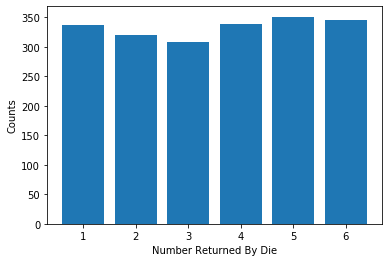

In [10]:
plt.bar(list(counts.keys()), list(counts.values()))
plt.xlabel("Number Returned By Die")
plt.ylabel("Counts")
plt.show()

Local versus Global Variables

Variables that you initialize within a function are called local functions. Their scope or lifetime does not extend beyond the function. In other words, once we exit the function (i.e., the function finishes its task) the local variable will cease to exist. An example is given below:

Assume that you have no variable called x outside the functions you have created.

def f():
    x = 25
    print(x)

What happens when you call f()? The function initializes a local variable called x and assigns 25 to it. It then prints 25. What happend when you do the following after you call f()?

print(x) --> x will not be available outside the function because it is local to x.

Now, consider the following scenario:

x = 10 #this is called a global variable because it is not inside a              #function

def f():
    x = 25
    print("Inside the function: ", x)

f() #what does this do? Will it print 25 or 10?
print("Outside the function: ", x) #what does this print?

Let us find out ....

In [11]:
x = 10 #this is called a global variable because it is not inside a function             #function

def f():
    x = 25
    print("Inside the function: ", x)

f() #what does this do? Will it print 25 or 10?
print("Outside the function: ", x) #what does this print?

Inside the function:  25
Outside the function:  10


Now, do you see the difference between local and global variables? In this case, we say that the local variable x is shadowing the global variable x. But, what if you wanted to use your global x within the function? To do so, you would have to explicitly declare that the function should use the global x, as shown below.

x = 10

def f():
    global x #ensures that the function uses the x declared outside
    x = 25
    print("Inside the function: ", x)

f()

print("Outside the function: ", x)

Let us try this.

In [12]:
x = 10

def f():
    global x #ensures that the function uses the x declared outside
    x = 25
    print("Inside the function: ", x)

f()

print("Outside the function: ", x)

Inside the function:  25
Outside the function:  25


Note that the function used the global variable and changed it to 25, which was displayed by the print statement outside the function.

Let us look at one more example to make sure we understand local and global variables.


In [2]:
#shows the difference between local and global variables
x = 10 #A global variable

def f():
    print("Inside function f: ", x) #The only x it knows is the global one

f() #should display 10, the value of the global variable, x

def g():
    x = 25 #which x - global or local?
    print("Inside function g: ", x)#should print 25

g()

print("After calling g: ", x) #global x, but has it been changed?

def h():
    global x
    x = 25

h()
print("After calling h: ", x) #global x was changed inside h()

Inside function f:  10
Inside function g:  25
After calling g:  10
After calling h:  25


Recursive functions

A function that calls itself is called a recursive function. Let us see the motivation for a function to call itself. We will start with an iterative solution for computing factorial and then use a recusrive function to do the same thing.

In [23]:
#Computing factorial - an iterative solution
def factorial(n):
    if n == 0 or n == 1:
        return 1
    result = 1
    while n > 1:
        result *= n
        n = n - 1
    return result

#let us test the function
print(factorial(1)) #should print 1
print(factorial(6)) #should print 720


1
720


Good, it seems to work! Let us now use recursion to solve the same problem. The key to recursion is to:
a) identify a stopping condition and
b) find a way to express the function on both sides of an equation.

What is the stopping condition for factorial? We know that when n is 0 or 1, the factorial is a 1. This then is your stopping rule. What about (b) (i.e., the second condition above) for factorial?

We know that:
factorial(n) = n * (n - 1) * (n - 2) * ... * 3 * 2 * 1
(for example, factorial 5 = 5 * 4 * 3 * 2 * 1)
But, (n - 1) * (n - 2) * ... 3 * 2 * 1 is factorial of (n - 1).
Therefore,
factorial(n) = n * factorial(n - 1)

Since we know the stopping rule and the second condition, we can write our recursive function as follows.


In [22]:
#recursive factorial function
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

#let us test the function
print(factorial(1)) #should print 1
print(factorial(6)) #should print 720

1
720


In general, recursive functions will be much shorter and more elegant. However, they can take more time to execute. 

Here is one you can try out. Write a recursive function to compute the nth value of the Fibonacci series. The series looks like this:
1 1 2 3 5 8 13 21 34 .....

As you can see, the first two numbers in the series are 1s and every number thereafter is a sum of the previous two in the series. Sample runs are shown below:
fibonacci(1) --> should return 1
fibonacci(2) --> should return 1
fibonacci(3) --> should return 2
fibonacci(4) --> should return 3
fibonacci(5) --> should return 5

and so on and so forth.